# **Predicition using Decision Tree Algorithm**
This task for the sparks foundation GRIP Internship.</br>
In this task, I will create a Decision tree classifier and visualize it graphically.

### Author : Abdelrahman Othman

# Import necessary libraries

In [1]:
import pandas as pd # For data analysis and manipulation.
import numpy as np # For mathematical functions.

import matplotlib.pyplot as plt #  For visualization 
import seaborn as sns # For visualization 

from sklearn.tree import DecisionTreeClassifier # For building DecisionTree classifier model.
from sklearn.tree import plot_tree # For tree visualization.
from sklearn.model_selection import cross_val_score # For cross validatation.
from sklearn.model_selection import GridSearchCV # For fine tuning the data.
from sklearn.metrics import plot_confusion_matrix # For ploting the confusion matrix
from sklearn.manifold import TSNE # For dimension reduction.

# Reading and preprocessing the data

In [2]:
# Reading the data
iris= pd.read_csv("data/Iris.csv")

In [3]:
# Display the data first 5 rows
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display descriptive statistics about the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
X = iris.drop(axis=1,columns=['Id','Species']) # Selecting the features 
y = iris['Species'] # Selecting the label

## Check if the labels is balanced or not

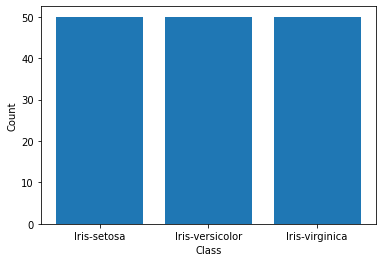

In [6]:
# Check if the data is balanced
plt.bar(y.unique(),y.value_counts())
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

From the graph we can see that the data is balanced.

# Modeling

## Training 

In [7]:
# Train the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
dtree.score(X,y)

1.0

## Crossvalidation

Because the data is not huge. Used cross validation, instead of splitting the data into train and test.  

In [8]:
np.random.seed(1) # a line to get the same randomization every run.
cross_val_result = cross_val_score(dtree, X, y, cv=3)
print(np.average(cross_val_result))

0.96


## Finetuning

Finetuning the model and check the best parameters we can use.

In [9]:
# All decision tree paramters
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
# The depth of the decision tree we trained above.
dtree.get_depth()

5

In [11]:
# Perform fintuning using grid search for the chosen paramters.
parameters = {'ccp_alpha': [0.0,0.1,0.5,1],
 'criterion': ['gini','entropy'],
 'max_depth': [2,3,4,5]}

gs_dtree = GridSearchCV(dtree, parameters)
gs_dtree.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]})

In [12]:
gs_dtree.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3}

In [13]:
np.random.seed(1)
cross_val_result = cross_val_score(gs_dtree, X, y, cv=3)
print(np.average(cross_val_result))

0.9666666666666667


The average accuracy of the cross validation has increased from 0.96 to 0.967 using the best parameters.

In [14]:
y_pred = gs_dtree.predict(X) # The predicted labels

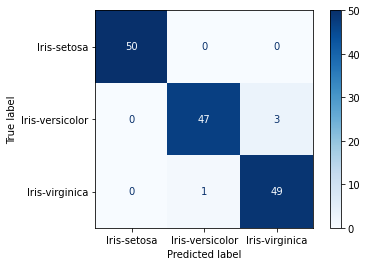

In [15]:
# Plot the confusion matrix
plot_confusion_matrix(gs_dtree,X,y,cmap='Blues')
plt.show()

The model is confused from two classes Iris-versicolor and Iris-virginca. </br>
Misclassified 3 points of Iris-versicolor and 1 point of Iris-virginica.

# Visualization 

Dimension reduction the data from 4 dimensions to 2 dimensions. So we can visualize the data.


In [16]:
X_embedded = TSNE(n_components=2).fit_transform(X)

Label missclassified data points as 'Missclassified'

In [17]:
y_with_wrong= y_pred 
y_with_wrong[y_pred != y] = 'Missclassified'

Plot and compare the True labels with the predicted labels. 

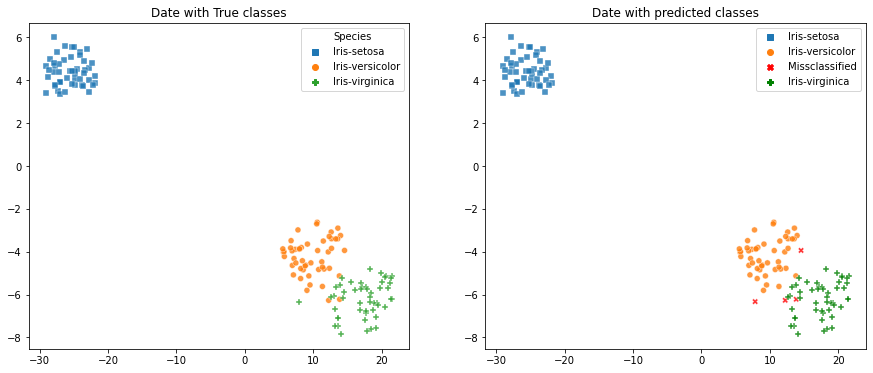

In [18]:
# Assign a mark for every class
markers = {"Iris-setosa": "s", "Iris-versicolor": "o","Missclassified":"X","Iris-virginica":"P"}

# Plot two plots beside eachother
fig, axs = plt.subplots(ncols=2,figsize=(15,6))

# Plot the true labels.
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],
                hue=y, style=y,ax=axs[0],
                markers=markers,
                alpha  = 0.8)

# Plot the predicted labels.
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],
                hue=y_with_wrong, style=y_with_wrong,
                markers=markers,
                palette=["C0", "C1", "r", "g"],
                 alpha  = 0.8,
                 ax=axs[1])

# Set a title for every subplot.
axs[0].set_title("Date with True classes")
axs[1].set_title("Date with predicted classes")
plt.show()

### The Decision Tree visualization.



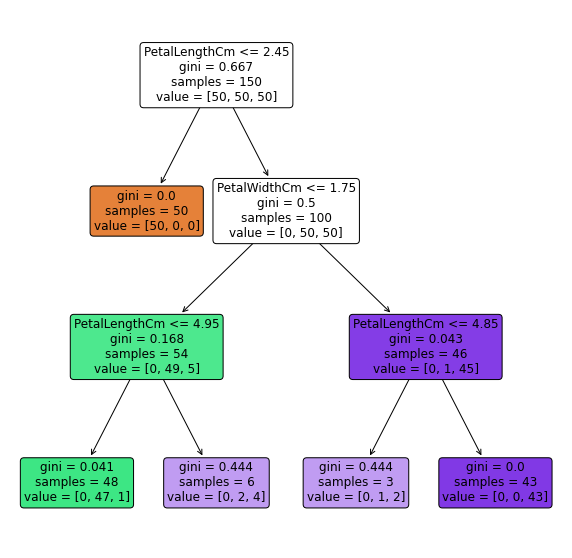

In [19]:
plt.figure(figsize=(10,10))
plot_tree(gs_dtree.best_estimator_,fontsize=12,feature_names=X.columns,filled=True,rounded=True)
plt.show()